<a href="https://colab.research.google.com/github/taaha3244/AtomCampAIBootcamp/blob/main/EDA_project_cricket_world_cup_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import os
from sklearn.impute import SimpleImputer


# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.set_option('display.max_rows', None)

# Loading all the datasets

In [ ]:
file_paths = [
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/innings.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/matches.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/overBallDetails.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/overHistory.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/players.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/teams.csv",
    "C:/Users/taaha/Downloads/Cricket_Dataset/ICC Cricket World Cup/venues.csv"
    # File paths for the files
]

In [ ]:
dataframes = []  # List to store dataframes

for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)


**Assigning Each Dataframe its name**

In [ ]:
innings=dataframes[0]
matches=dataframes[1]
overBallDetails=dataframes[2]
overHistory=dataframes[3]
players=dataframes[4]
teams=dataframes[5]
venues=dataframes[6]


Lets look at the shape of all the DataFrames

In [ ]:
for df in dataframes:
    print(f"The shape of the dataframe is: ",df.shape)

The shape of the dataframe is:  (2682, 18)
The shape of the dataframe is:  (1700, 174)
The shape of the dataframe is:  (157323, 8)
The shape of the dataframe is:  (110411, 18)
The shape of the dataframe is:  (28911, 9)
The shape of the dataframe is:  (354, 6)
The shape of the dataframe is:  (193, 5)


**The max number of rows in our data are 157323 and max columns are 174 Lets investigate 174 columns thats a lot of columns.They are in matches**

In [ ]:
matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,matchStatus_outcome,matchStatus_text,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,matchStatus_victoryMarginInningsRuns,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,A,Australia won by 73 runs,NaN,NaN,NaN,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,B,New Zealand won by 181 runs,NaN,NaN,NaN,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0

Seems like columns after Umpire name are all empty .Lets drop these extra columns

In [ ]:
matches= matches.drop(matches.iloc[:, 25:],axis = 1)

In [ ]:
print(f"The Shape of Matches is : ",matches.shape)

The Shape of Matches is :  (1700, 25)


# Investigating Innings Data

In [ ]:
innings

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.00,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.20,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.00,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.10,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.00,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2678,101735,2,5.47,26.50,147,10,161,16,1,True,0,4,0,2,0,16.00,11.00
2678,2679,102844,1,4.33,49.10,213,10,295,12,4,True,0,20,0,1,0,14.00,13.00
2679,2680,102844,2,4.14,41.30,172,10,249,16,1,True,1,8,0,6,0,13.00,14.00
2680,2681,102109,1,6.76,50.00,338,6,300,32,7,False,0,9,0,3,0,19.00,15.00


In [ ]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool   
 11  noBallRuns     2682 non-null   int64  
 12  wideRuns       2682 non-null   int64  
 13  byeRuns        2682 non-null   int64  
 14  legByeRuns     2682 non-null   int64  
 15  penaltyRuns    2682 non-null   int64  
 16  battingTeamId  601 non-null    float64
 17  bowlingTeamId  601 non-null    float64
dtypes: bool(

Total 2682 rows and 18 columns .Has missing values in battingTeamId and bowlingTeamId

In [ ]:
#Lets focus on the missing values first
innings.isnull().sum()

id                  0
matchId             0
inningsNumber       0
runRate             0
overProgress        0
runs                0
wkts                0
ballsFaced          0
fours               0
sixes               0
allOut              0
noBallRuns          0
wideRuns            0
byeRuns             0
legByeRuns          0
penaltyRuns         0
battingTeamId    2081
bowlingTeamId    2081
dtype: int64

'battingTeamId' and 'bowlingTeamId' are Secondary keys for teams Dataframe. And 2081 of them are missing. That is 76% of the innings dataframe. Surely we cant delete the missing values rows. For, now lets replace it with 'Missing_id'

In [ ]:
innings[['battingTeamId', 'bowlingTeamId']] = innings[['battingTeamId', 'bowlingTeamId']].fillna('Mising_id')

Looking for duplicates

In [ ]:
innings[innings.duplicated()]

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId


Lets look for outliers

In [ ]:
def calculate_z_scores(df):
    z_scores=(df-df.mean(numeric_only=True))/df.std(numeric_only=True)
    outliers=(z_scores>2) | (z_scores<-2)
    return outliers.sum()

In [ ]:
calculate_z_scores(innings)

allOut             0
ballsFaced       332
battingTeamId      0
bowlingTeamId      0
byeRuns          114
fours            215
id                 0
inningsNumber      0
legByeRuns       164
matchId            0
noBallRuns       162
overProgress     171
penaltyRuns       14
runRate          106
runs             109
sixes            177
wideRuns         105
wkts              83
dtype: int64

There are some outliers in the dataset,will further look for them in visualization

In [ ]:
innings.describe()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns
count,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00
mean,1341.50,26651.46,1.49,5.28,43.77,231.86,7.42,58.70,4.33,0.95,0.67,7.34,0.91,3.39,0.03
std,774.37,38412.37,0.50,1.17,9.00,70.90,2.74,112.28,8.79,2.43,1.09,4.46,1.69,2.79,0.36
min,1.00,543.00,1.00,2.37,0.40,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,671.25,3166.00,1.00,4.44,41.00,186.00,6.00,0.00,0.00,0.00,0.00,4.00,0.00,1.00,0.00
50%,1341.50,6896.00,1.00,5.21,48.20,233.50,8.00,0.00,0.00,0.00,0.00,7.00,0.00,3.00,0.00
75%,2011.75,31750.00,2.00,6.00,50.00,282.00,10.00,0.00,0.00,0.00,1.00,10.00,1.00,5.00,0.00
max,2682.00,102980.00,2.00,14.16,50.00,498.00,11.00,300.00,48.00,26.00,13.00,37.00,13.00,16.00,5.00


# Data Analysis on Innings

**1. WHich innings had a higher score on general 1st innings or the second**

**2. Which innings has a higher chance of getting bowled out?**

**3. Which innings has higher run rate**

**4. Distribution of Boundaries by INNINGS**



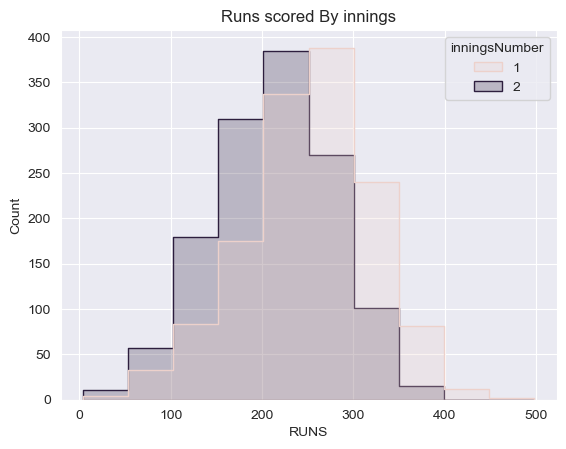

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.histplot(data=innings, x='runs', hue='inningsNumber', stat='count', common_norm=False, element='step', bins=10)
g.set(xlabel='RUNS')
g.set_title('Runs scored By innings')
plt.show()

Ths clearly shows that The chances of scoring less score is High in2nd innings and Low in 1st innings

In [ ]:
allOut_t=innings[(innings['allOut']==True)]

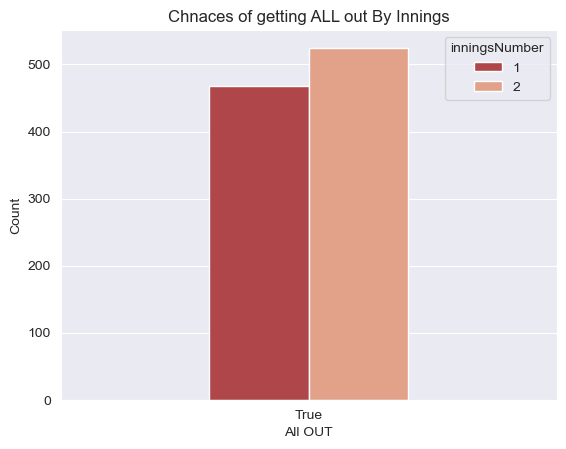

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.countplot(data=allOut_t,x='allOut',hue='inningsNumber',width=0.4)
g.set(xlabel='All OUT',ylabel='Count')
g.set_title('Chnaces of getting ALL out By Innings')
plt.show()

2nd innings has higher chances of getting All out

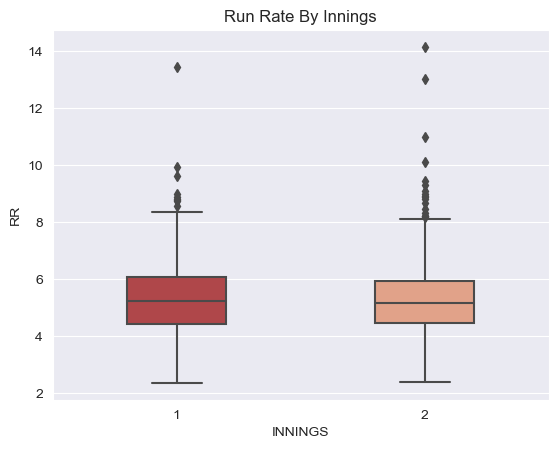

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.boxplot(data=innings,x='inningsNumber',y='runRate',width=0.4)
g.set(xlabel='INNINGS',ylabel='RR')
g.set_title('Run Rate By Innings')
plt.show()


The Median RR is same for Both innings but 2nd innings have more outliers

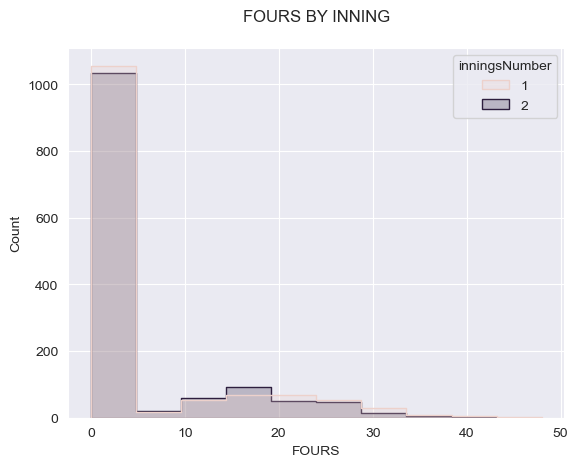

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.histplot(data=innings,x='fours',hue='inningsNumber',stat='count', common_norm=False, element='step', bins=10)
g.set(xlabel='FOURS',ylabel='Count')
g.set_title('FOURS BY INNING',y=1.05)
plt.show()

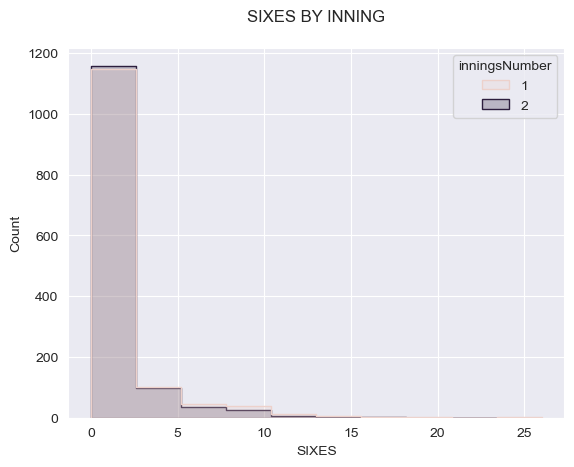

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.histplot(data=innings,x='sixes',hue='inningsNumber',stat='count', common_norm=False, element='step', bins=10)
g.set(xlabel='SIXES',ylabel='Count')
g.set_title('SIXES BY INNING',y=1.05)
plt.show()

Chances of hitting boundaries are almost same by innings

__According to Innings data it is preferable to Choose first innings__

#  Matches DataFrame

In [ ]:
matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,matchStatus_outcome,matchStatus_text,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,matchStatus_victoryMarginInningsRuns,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,A,Australia won by 73 runs,NaN,NaN,NaN,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,B,New Zealand won by 181 runs,NaN,NaN,NaN,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,A,England won by 202 runs,NaN,NaN,NaN,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,171371000000.00,171414000000.00,B,West Indies won by 9 wickets,NaN,NaN,NaN,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,171716000000.00,171760000000.00,A,Australia won by 52 runs,NaN,NaN,NaN,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1700 non-null   int64  
 1   venueId                               1700 non-null   int64  
 2   toss.elected                          1600 non-null   object 
 3   toss.winner                           1600 non-null   object 
 4   team1Id                               1700 non-null   int64  
 5   team2Id                               1700 non-null   int64  
 6   matchDate                             1700 non-null   object 
 7   matchEndDate                          1674 non-null   object 
 8   matchDateMs                           1675 non-null   float64
 9   matchEndDateMs                        1358 non-null   float64
 10  matchStatus_outcome                   1689 non-null   object 
 11  matchStatus_text 

It looks like alot of columns have missing values

In [ ]:
def cat_num(df):
    # Separate categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(exclude=['object']).columns

    # Display the separated columns
    print("Categorical Columns:")
    print(categorical_columns)
    print("\nMissing Values are : ")
    print(df[categorical_columns].isnull().sum())

    print("\nNumerical Columns:")
    print(numerical_columns)
    print("\nMissing Values are : ")
    print(df[numerical_columns].isnull().sum())


In [ ]:
cat_num(matches)

Categorical Columns:
Index(['toss.elected', 'toss.winner', 'matchDate', 'matchEndDate',
       'matchStatus_outcome', 'matchStatus_text', 'description',
       'matchSummary', 'matchType', 'tournamentLabel', 'match.summary',
       'umpire.name.5'],
      dtype='object')

Missing Values are : 
toss.elected            100
toss.winner             100
matchDate                 0
matchEndDate             26
matchStatus_outcome      11
matchStatus_text          8
description               0
matchSummary            799
matchType                 0
tournamentLabel           0
match.summary           822
umpire.name.5          1698
dtype: int64

Numerical Columns:
Index(['id', 'venueId', 'team1Id', 'team2Id', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'oversLimit', 'totalBalls',
       'isLimitedOvers', 'matchStatus'],
      dtype='object')

Missing Values are : 
id                  

Handling missing values in categorical columns involves making decisions about how to impute or handle these missing entries. Here are some common strategies:

1. Imputation with Mode:
Approach: Replace missing values with the most frequent category (mode) in the column.

2. Create a New Category for Missing Values:
Approach: Introduce a new category to represent missing values.

Adding Most frequent valus in these categorical columns will not be viable because of high cadinality as there are various unique values in our dataset

Segregating Categorical And Numerical Columns

In [ ]:
categorical_columns = matches.select_dtypes(include=['object']).columns
numerical_columns = matches.select_dtypes(exclude=['object']).columns

There are some date columns on Categorical Columns list so lets dig in to these date columns

In [ ]:
dates=matches.loc[:,['matchEndDate','matchDate']]
dates.head()

,matchEndDate,matchDate
0,1975-06-07T23:00:00+0000,1975-06-07T11:00:00+0000
1,1975-06-07T23:00:00+0000,1975-06-07T11:00:00+0000
2,1975-06-07T23:00:00+0000,1975-06-07T11:00:00+0000
3,1975-06-07T23:00:00+0000,1975-06-07T11:00:00+0000
4,1975-06-11T23:00:00+0000,1975-06-11T11:00:00+0000


Seems like match Start and End dates are same in One day World Cups. so, missing values in match end date should be imputed from match start date

In [ ]:
matches['matchEndDate']=matches['matchEndDate'].fillna(matches['matchDate'])

Changing the datatype of date time columns to dt

In [ ]:
matches['matchDate'] = pd.to_datetime(matches['matchDate'],format='ISO8601',utc=True)
matches['matchEndDate']=pd.to_datetime(matches['matchEndDate'],format='ISO8601',utc=True)

Looking at date time now

In [ ]:
matches.loc[:,['matchEndDate','matchDate']].head(5)

,matchEndDate,matchDate
0,1975-06-07 23:00:00+00:00,1975-06-07 11:00:00+00:00
1,1975-06-07 23:00:00+00:00,1975-06-07 11:00:00+00:00
2,1975-06-07 23:00:00+00:00,1975-06-07 11:00:00+00:00
3,1975-06-07 23:00:00+00:00,1975-06-07 11:00:00+00:00
4,1975-06-11 23:00:00+00:00,1975-06-11 11:00:00+00:00


Imputing rest of the categorical columns as  "MISSING"

In [ ]:
matches[categorical_columns]=matches[categorical_columns].fillna('Missing')
matches.isnull().sum()

id                                         0
venueId                                    0
toss.elected                               0
toss.winner                                0
team1Id                                    0
team2Id                                    0
matchDate                                  0
matchEndDate                               0
matchDateMs                               25
matchEndDateMs                           342
matchStatus_outcome                        0
matchStatus_text                           0
matchStatus_victoryMarginRuns           1554
matchStatus_victoryMarginWickets        1557
matchStatus_victoryMarginInningsRuns    1700
description                                0
matchSummary                               0
matchType                                  0
tournamentLabel                            0
oversLimit                                 0
totalBalls                              1383
isLimitedOvers                             0
match.summ

match.summary and matchSummary  columns are derived out of matchStatus_text and have no extra information but Missing values
Dropping these both columns

In [ ]:
matches=matches.drop(matches[['matchSummary','match.summary']],axis=1)
print(matches.columns)

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'description', 'matchType',
       'tournamentLabel', 'oversLimit', 'totalBalls', 'isLimitedOvers',
       'matchStatus', 'umpire.name.5'],
      dtype='object')


In [ ]:
matches[numerical_columns].isnull().sum()

id                                         0
venueId                                    0
team1Id                                    0
team2Id                                    0
matchDateMs                               25
matchEndDateMs                           342
matchStatus_victoryMarginRuns           1554
matchStatus_victoryMarginWickets        1557
matchStatus_victoryMarginInningsRuns    1700
oversLimit                                 0
totalBalls                              1383
isLimitedOvers                             0
matchStatus                             1700
dtype: int64

'matchDateMs' and 'matchEndMs' are derived out of match date columns and are in UNIX datetime format. These columns can be dropped and if this date time format is req. in analysis we can convert it from date columns

The same is the case with matchStatus_victoryMarginInningsRuns' .Derived from other columns from innings table and having more than 80% of data missing.    

In [ ]:
matches=matches.drop(['matchDateMs','matchEndDateMs','matchStatus_victoryMarginInningsRuns'],axis=1)

In [ ]:
matches.shape

(1700, 20)

total Balls column has approx 1400 missing values , it can be filled with 300 but from 1975 to 1983 in three world cups overs limit is 60 so 360 balls

from Datetime column Extracting year and appending it as another column

In [ ]:

# # Extract the year and append it to the DataFrame
matches['Year'] =matches['matchDate'].dt.year


# # Display the DataFrame with the new 'Year' column
matches.head(5)

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchStatus_outcome,matchStatus_text,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,description,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,matchStatus,umpire.name.5,Year
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,A,Australia won by 73 runs,NaN,NaN,Match 1,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Missing,1975
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,B,New Zealand won by 181 runs,NaN,NaN,Match 2,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Missing,1975
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,A,England won by 202 runs,NaN,NaN,Match 3,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Missing,1975
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,B,West Indies won by 9 wickets,NaN,NaN,Match 4,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Missing,1975
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,1975-06-11 23:00:00+00:00,A,Australia won by 52 runs,NaN,NaN,Match 5,ODI,Prudential World Cup 1975,60,NaN,True,NaN,Missing,1975


Match Status ,Match status Wicket and Runs Margins can be Sliced From Match Status Text

In [ ]:
#Create a condition on which column to be replaced
cond_1=matches['matchStatus_outcome']=='A'
cond_2=matches['matchStatus_outcome']=='B'
matches['matchStatus']=matches['matchStatus'].fillna(pd.Series(np.where(cond_1, 'Match Won','Match Lost')))

In [ ]:

import re

# Function to extract numeric values from the text based on patterns
def extract_numeric_value(text, pattern):
    if isinstance(text, str):
        match = re.search(pattern, text)
        return int(match.group(1)) if match else np.nan
    return np.nan

# Define patterns for 'runs' and 'wickets'
pattern_runs = r'(\d+) runs'
pattern_wickets = r'(\d+) wickets'



# Fill 'matchStatus_victoryMarginRuns' based on 'runs' pattern and 'wickets' pattern
matches['matchStatus_victoryMarginRuns'] = np.where(matches['matchStatus_text'].str.contains(pattern_runs, na=False),
    matches['matchStatus_text'].apply(lambda x: extract_numeric_value(x, pattern_runs)),np.where(
        matches['matchStatus_text'].str.contains(pattern_wickets, na=False),
        np.nan,
        matches['matchStatus_victoryMarginRuns']
    )
)

# Fill 'matchStatus_victoryMarginWickets' based on 'wickets' pattern and 'runs' pattern
matches['matchStatus_victoryMarginWickets'] = np.where(
    matches['matchStatus_text'].str.contains(pattern_wickets, na=False),
    matches['matchStatus_text'].apply(lambda x: extract_numeric_value(x, pattern_wickets)),
    np.where(
        matches['matchStatus_text'].str.contains(pattern_runs, na=False),
        np.nan,
        matches['matchStatus_victoryMarginWickets']
    )
)

# Display the updated DataFrame

In [ ]:
condition_1 = matches['Year'].isin([1975, 1978, 1974])
condition_2 = ~condition_1

# Define values to fill based on conditions
value_condition_1 = 360
value_condition_2 = 300

# Use conditions with fillna
matches['totalBalls']=matches['totalBalls'].fillna(pd.Series(np.where(condition_1, value_condition_1,value_condition_2)))

Now  'matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets' Columns have been filled according to the text in match Status_text column. E.g 'Pakistan won by 10 wickets' So each remaining null value will be imputed as 0. because null now indicated that match was won by runs or wickets in each column

In [ ]:
matches[['matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets' ]]=matches[['matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets' ]].fillna(0)

In [ ]:
matches.isnull().sum()

id                                  0
venueId                             0
toss.elected                        0
toss.winner                         0
team1Id                             0
team2Id                             0
matchDate                           0
matchEndDate                        0
matchStatus_outcome                 0
matchStatus_text                    0
matchStatus_victoryMarginRuns       0
matchStatus_victoryMarginWickets    0
description                         0
matchType                           0
tournamentLabel                     0
oversLimit                          0
totalBalls                          0
isLimitedOvers                      0
matchStatus                         0
umpire.name.5                       0
Year                                0
dtype: int64

In [ ]:
matches.describe()

,id,venueId,team1Id,team2Id,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,oversLimit,totalBalls,Year
count,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00
mean,22892.42,4913.96,13677682.80,15417866.26,35.58,2.52,50.26,300.53,2013.76
std,35844.45,21293.21,136935065.21,145322817.11,55.00,3.22,2.19,5.61,10.11
min,543.00,1.00,0.00,0.00,0.00,0.00,21.00,300.00,1975.00
25%,2970.75,45.75,1569.25,1569.75,0.00,0.00,50.00,300.00,2013.00
50%,4328.50,84.00,3271.00,3272.00,0.00,0.00,50.00,300.00,2017.00
75%,21565.25,128.00,8300.00,8301.00,61.00,6.00,50.00,300.00,2020.00
max,102980.00,100236.00,2147212060.00,2089042683.00,317.00,10.00,60.00,360.00,2023.00


1. The highest Margin Runs Win in World Cups is 317 Runs
2. In Initial Years the total number of overs were 60
3. In world cups Mean Win by Runs is 35 Runs and Mean Wicket Win is 2 wickets

In [ ]:
matches.describe(include='O')

,toss.elected,toss.winner,matchStatus_outcome,matchStatus_text,description,matchType,tournamentLabel,matchStatus,umpire.name.5
count,1700,1700,1700,1700,1700,1700,1700,1700,1700
unique,117,35,5,1013,350,1,309,2,3
top,Missing,Sri Lanka,A,Match cancelled without a ball bowled,1st ODI,ODI,ICC World Cup 2002/03,Match Won,Missing
freq,100,144,897,30,196,1700,54,897,1698


1. Seems like Sri Lanka has won Highest number of tosses
2. A total of 30 times matches were cancelled without any bowls bowled
3. More matches were won

# ANALYZING MATCHES


**1.Which team won most tosses?**

**2.What was the most common decision by winning team?**

**3.How many matches were abandoned and walkover was given**

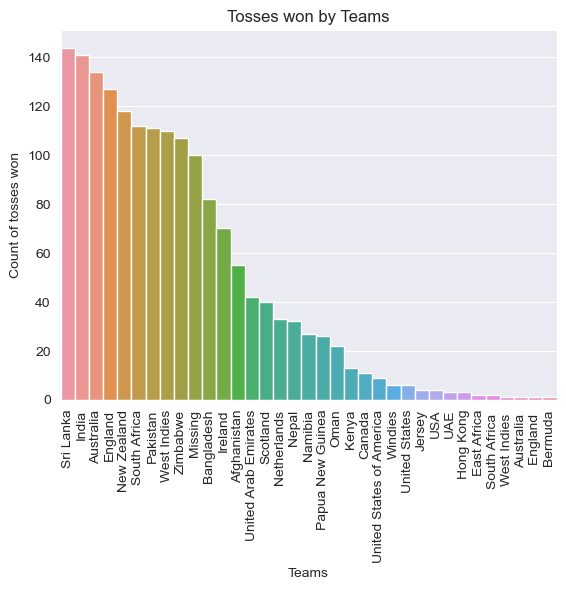

In [ ]:
order = matches['toss.winner'].value_counts().index
sns.set_style('darkgrid')
sns.set_palette('Blues')
g=sns.countplot(data=matches,x='toss.winner',width=1,order=order)
g.set(xlabel='Teams',ylabel='Count of tosses won')
g.set_title('Tosses won by Teams')
plt.xticks(rotation=90)
plt.show()

Srilanka seems Lucky followed by India

In [ ]:
matches

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchStatus_outcome,matchStatus_text,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,description,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,matchStatus,umpire.name.5,Year
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,A,Australia won by 73 runs,73.00,0.00,Match 1,ODI,Prudential World Cup 1975,60,360.00,True,Match Won,Missing,1975
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,B,New Zealand won by 181 runs,181.00,0.00,Match 2,ODI,Prudential World Cup 1975,60,360.00,True,Match Lost,Missing,1975
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,A,England won by 202 runs,202.00,0.00,Match 3,ODI,Prudential World Cup 1975,60,360.00,True,Match Won,Missing,1975
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,1975-06-07 23:00:00+00:00,B,West Indies won by 9 wickets,0.00,9.00,Match 4,ODI,Prudential World Cup 1975,60,360.00,True,Match Lost,Missing,1975
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,1975-06-11 23:00:00+00:00,A,Australia won by 52 runs,52.00,0.00,Match 5,ODI,Prudential World Cup 1975,60,360.00,True,Match Won,Missing,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,102108,62,South Africa who chose to bowl,South Africa,19,15,2023-09-09 11:00:00+00:00,2023-09-09 19:00:00+00:00,B,Australia won by 123 runs,123.00,0.00,Australia won by 123 runs,ODI,South Africa v Australia - 2023 Men's ODI Series,50,300.00,True,Match Lost,Missing,2023
1696,102843,100013,Pakistan who chose to bowl,Pakistan,20,14,2023-09-10 09:30:00+00:00,2023-09-10 16:30:00+00:00,B,India won by 228 runs,228.00,0.00,India won by 228 runs,ODI,Asia Cup 2023,50,300.00,True,Match Lost,Missing,2023
1697,101735,72,New Zealand who chose to bowl,New Zealand,11,16,2023-09-10 10:00:00+00:00,2023-09-10 18:00:00+00:00,A,England won by 79 runs,79.00,0.00,England won by 79 runs,ODI,England v New Zealand - 2023 Men's ODI Series,50,300.00,True,Match Won,Missing,2023
1698,102844,100013,India who chose to bat,India,14,13,2023-09-12 09:30:00+00:00,2023-09-12 16:30:00+00:00,A,India won by 41 runs,41.00,0.00,India won by 41 runs,ODI,Asia Cup 2023,50,300.00,True,Match Won,Missing,2023


In [ ]:
import re

# Define the pattern using a positive lookbehind for 'to'
pattern =r'to (.*)'


# Use str.extract to create a new column with extracted values
import re
matches['Toss Decision'] = matches['toss.elected'].str.extract(pattern)
matches['Toss Decision'].value_counts()

Toss Decision
bat      746
field    654
bowl     188
Bat        6
Field      4
 bat       1
Name: count, dtype: int64

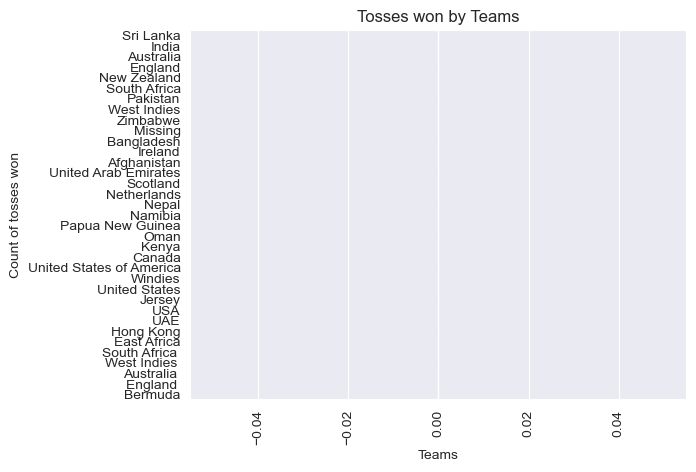

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Blues')
g=sns.countplot(data=matches,y='Toss Decision',width=1,order=order)
g.set(xlabel='Teams',ylabel='Count of tosses won')
g.set_title('Tosses won by Teams')
plt.xticks(rotation=90)
plt.show()

# overBallDetails

In [ ]:
overBallDetails.set_index('id')

,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
id,,,,,,,
1,1,1,1,5591.00,1220.00,False,84666
2,2,2,.,5591.00,1601.00,False,84666
3,3,3,.,5591.00,1601.00,False,84666
4,4,4,1Wd,5591.00,1601.00,False,84666
5,4,5,.,5591.00,1601.00,False,84666
...,...,...,...,...,...,...,...
157319,5,5,.,1894.00,857.00,False,110410
157320,6,6,.,1894.00,857.00,False,110410
157321,1,1,4,4567.00,17118.00,True,110411


In [ ]:
overBallDetails.isnull().sum()

id                   0
countingBall         0
nonCountingBall      0
score                0
bowlerId           101
facingBatsmanId      3
boundary             0
overHistoryId        0
dtype: int64

In this DataFrame bowlerId has missing values which will be imputed as missing as other IDs in different columns

In [ ]:
overBallDetails[['bowlerId','facingBatsmanId']]=overBallDetails[['bowlerId','facingBatsmanId']].fillna('Missing_id')

In [ ]:
overBallDetails.isnull().sum()

id                 0
countingBall       0
nonCountingBall    0
score              0
bowlerId           0
facingBatsmanId    0
boundary           0
overHistoryId      0
dtype: int64

In [ ]:
overBallDetails.describe()

,id,countingBall,nonCountingBall,overHistoryId
count,157323.00,157323.00,157323.00,157323.00
mean,78662.00,3.49,3.59,97540.01
std,45415.38,1.71,1.79,7434.83
min,1.00,1.00,1.00,84666.00
25%,39331.50,2.00,2.00,91097.00
50%,78662.00,3.00,4.00,97546.00
75%,117992.50,5.00,5.00,103976.00
max,157323.00,7.00,11.00,110411.00


In [ ]:
overBallDetails.describe(include='O')

,score,bowlerId,facingBatsmanId
count,157323,157323.00,157323.00
unique,36,404.00,545.00
top,.,100520.00,100002.00
freq,78098,1783.00,2117.00


1. Most common Score is a Dot Ball

# overHistory

In [ ]:
overHistory.head()

,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
overHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ovNo        110411 non-null  int64  
 1   ovBalls/0   110411 non-null  object 
 2   ovBalls/1   110164 non-null  object 
 3   ovBalls/2   109906 non-null  object 
 4   ovBalls/3   109665 non-null  object 
 5   ovBalls/4   109405 non-null  object 
 6   ovBalls/5   108996 non-null  object 
 7   ovBalls/6   14563 non-null   object 
 8   id          110411 non-null  int64  
 9   inningId    110411 non-null  int64  
 10  ovBalls/7   1998 non-null    object 
 11  ovBalls/8   278 non-null     object 
 12  ovBalls/9   45 non-null      object 
 13  ovBalls/10  9 non-null       object 
 14  ovBalls/11  2 non-null       object 
 15  ovBalls/12  1 non-null       object 
 16  ovBalls/13  1 non-null       object 
 17  bowlerId    25729 non-null   float64
dtypes: float64(1), int64(3), object(14)
memory u

In [ ]:
overHistory.isnull().sum()

ovNo               0
ovBalls/0          0
ovBalls/1        247
ovBalls/2        505
ovBalls/3        746
ovBalls/4       1006
ovBalls/5       1415
ovBalls/6      95848
id                 0
inningId           0
ovBalls/7     108413
ovBalls/8     110133
ovBalls/9     110366
ovBalls/10    110402
ovBalls/11    110409
ovBalls/12    110410
ovBalls/13    110410
bowlerId       84682
dtype: int64

OverBalls7 to OverBalls 13 shows that there were cases when more than 6 Ballas were Bowled due to Wides or Maybe Noballs
Imputing First 6 balls missing values with Dot ball as it is the most probable outcome out of all. Will use Mode to do this

In [ ]:
columns=overHistory.columns

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
sixBalls=overHistory.iloc[:,1:8]
overHistory[sixBalls.columns]=pd.DataFrame(imputer.fit_transform(sixBalls),columns=sixBalls.columns)


The rest of the columns except bowlerId can be imputed with 0

In [ ]:
restBalls=overHistory.iloc[:,10:17]
overHistory[restBalls.columns]=overHistory.iloc[:,10:17].fillna(0)

The Bowler Id will be imputed as missing

In [ ]:
overHistory['bowlerId']=overHistory['bowlerId'].fillna('Missing_id')

In [ ]:
overHistory.isnull().sum()

ovNo          0
ovBalls/0     0
ovBalls/1     0
ovBalls/2     0
ovBalls/3     0
ovBalls/4     0
ovBalls/5     0
ovBalls/6     0
id            0
inningId      0
ovBalls/7     0
ovBalls/8     0
ovBalls/9     0
ovBalls/10    0
ovBalls/11    0
ovBalls/12    0
ovBalls/13    0
bowlerId      0
dtype: int64

In [ ]:
overHistory.describe()

,ovNo,id,inningId
count,110411.00,110411.00,110411.00
mean,23.46,55206.00,1316.44
std,13.82,31873.05,784.59
min,1.00,1.00,1.00
25%,12.00,27603.50,638.00
50%,23.00,55206.00,1277.00
75%,35.00,82808.50,2009.00
max,50.00,110411.00,2682.00


1. Seems liks overHistory has no data of 60 overs worldcup overs

In [ ]:
overHistory.describe(include='O')

,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
count,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411,110411
unique,34,36,36,38,35,35,28,20,14,6,6,3,2,2,402
top,.,.,.,.,.,.,.,0,0,0,0,0,0,0,Missing_id
freq,53158,53355,53419,53583,54040,55055,102810,108413,110133,110366,110402,110409,110410,110410,84682


# Players


In [ ]:
players.head()

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28911 non-null  int64 
 1   fullName        28911 non-null  object
 2   shortName       28911 non-null  object
 3   nationality     28249 non-null  object
 4   dateOfBirth     28349 non-null  object
 5   rightArmedBowl  28911 non-null  bool  
 6   rightHandedBat  28911 non-null  bool  
 7   bowlingStyle    18328 non-null  object
 8   teamId          28911 non-null  int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB


In [ ]:
players.isnull().sum()

id                    0
fullName              0
shortName             0
nationality         662
dateOfBirth         562
rightArmedBowl        0
rightHandedBat        0
bowlingStyle      10583
teamId                0
dtype: int64

In [ ]:
players.describe(include='O')

,fullName,shortName,nationality,dateOfBirth,bowlingStyle
count,28911,28911,28249,28349,18328
unique,1850,1865,50,1623,6
top,Virat Kohli,V Kohli,Indian,1987-04-30,MEDIUM_SEAM
freq,174,174,2851,184,5389


1. It seems one players name is numerous times in the data Like Virat Kohli
2. There are alot of duplicates in this data
3. A total of 1850 Players have played Cricket World Cups

Filling in the empty columns with MISSINg becaues of  High Cardinality

In [ ]:
players=players.fillna('Missing')

In [ ]:
players_no_duplicates = players.drop_duplicates(subset=['fullName'])

In [ ]:
players_no_duplicates.describe(include='O')

,fullName,shortName,nationality,dateOfBirth,bowlingStyle
count,1850,1850,1850,1850,1850
unique,1850,1790,48,1600,7
top,Rick McCosker,A Ali,Missing,Missing,Missing
freq,1,4,157,137,1170


# Teams

In [ ]:
teams

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.00,1988.00
1,11,England,England,ENG,1996.00,2004.00
2,11,England,England,ENG,2229.00,2096.00
3,11,England,England,ENG,2222.00,2226.00
4,11,England,England,ENG,2330.00,2169.00
...,...,...,...,...,...,...
349,572,United States of America,United States of America,USA,430105.00,398513.00
350,572,United States of America,USA,USA,17111.00,17109.00
351,572,United States of America,USA,USA,19127.00,17109.00
352,572,United States of America,United States of America,USA,1159641.00,398513.00


In [ ]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB


In [ ]:
teams.describe(include='O')

,fullName,shortName,abbreviation
count,354,354,354
unique,26,29,26
top,Sri Lanka,Sri Lanka,SL
freq,40,40,40


In [ ]:
teams.isnull().sum()

id                0
fullName          0
shortName         0
abbreviation      0
wicketKeeperId    7
captainId         6
dtype: int64

In [ ]:
teams['fullName'].value_counts()

fullName
Sri Lanka                   40
Australia                   29
Zimbabwe                    27
Pakistan                    25
New Zealand                 25
West Indies                 25
India                       24
South Africa                22
England                     20
Afghanistan                 15
Bangladesh                  15
Scotland                    11
United Arab Emirates        10
Ireland                     10
Netherlands                  8
Nepal                        8
Kenya                        7
Papua New Guinea             6
Namibia                      5
Canada                       5
United States of America     5
Oman                         4
Hong Kong                    4
East Africa                  2
Jersey                       1
Bermuda                      1
Name: count, dtype: int64

In [ ]:
teams=teams.fillna('Missing')

In [ ]:
teams.isnull().sum()

id                0
fullName          0
shortName         0
abbreviation      0
wicketKeeperId    0
captainId         0
dtype: int64

# Venues

In [ ]:
venues

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India
...,...,...,...,...,...
188,100165,Shaheed Veer Narayan Singh International Crick...,NaN,NaN,NaN
189,100178,YS Raja Reddy Stadium,NaN,Kadapa,NaN
190,100187,United Cricket Club Ground,NaN,NaN,NaN
191,100194,Mahinda Rajapaksa International Cricket Stadium,NaN,Sooriyawewa,NaN


In [ ]:
venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  173 non-null    object
 3   city       185 non-null    object
 4   country    173 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB


In [ ]:
venues.describe(include='O')

,fullName,shortName,city,country
count,193,173,185,173
unique,179,168,144,25
top,County Ground,Greater Noida Sports Complex Ground,Dublin,India
freq,3,2,6,42


In [ ]:
venues=venues.fillna('Missing')

In [ ]:
venues.isnull().sum()

id           0
fullName     0
shortName    0
city         0
country      0
dtype: int64